In [1]:
from google.colab import files

In [11]:
# Visualization Libraries
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocessing Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

# ML Libraries
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# Evaluation Metrics
from yellowbrick.classifier import ClassificationReport
from sklearn import metrics

In [12]:
uploaded=files.upload()




Saving Training.csv to Training (1).csv


In [21]:
data = pd.read_csv('Training.csv', encoding='ISO-8859-9')

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 134 entries, itching to specialist
dtypes: int64(132), object(2)
memory usage: 5.0+ MB


In [23]:
data.isnull().count

<bound method DataFrame.count of       itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  \
0       False      False                 False                False   
1       False      False                 False                False   
2       False      False                 False                False   
3       False      False                 False                False   
4       False      False                 False                False   
...       ...        ...                   ...                  ...   
4915    False      False                 False                False   
4916    False      False                 False                False   
4917    False      False                 False                False   
4918    False      False                 False                False   
4919    False      False                 False                False   

      shivering  chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
0         False   False       Fals

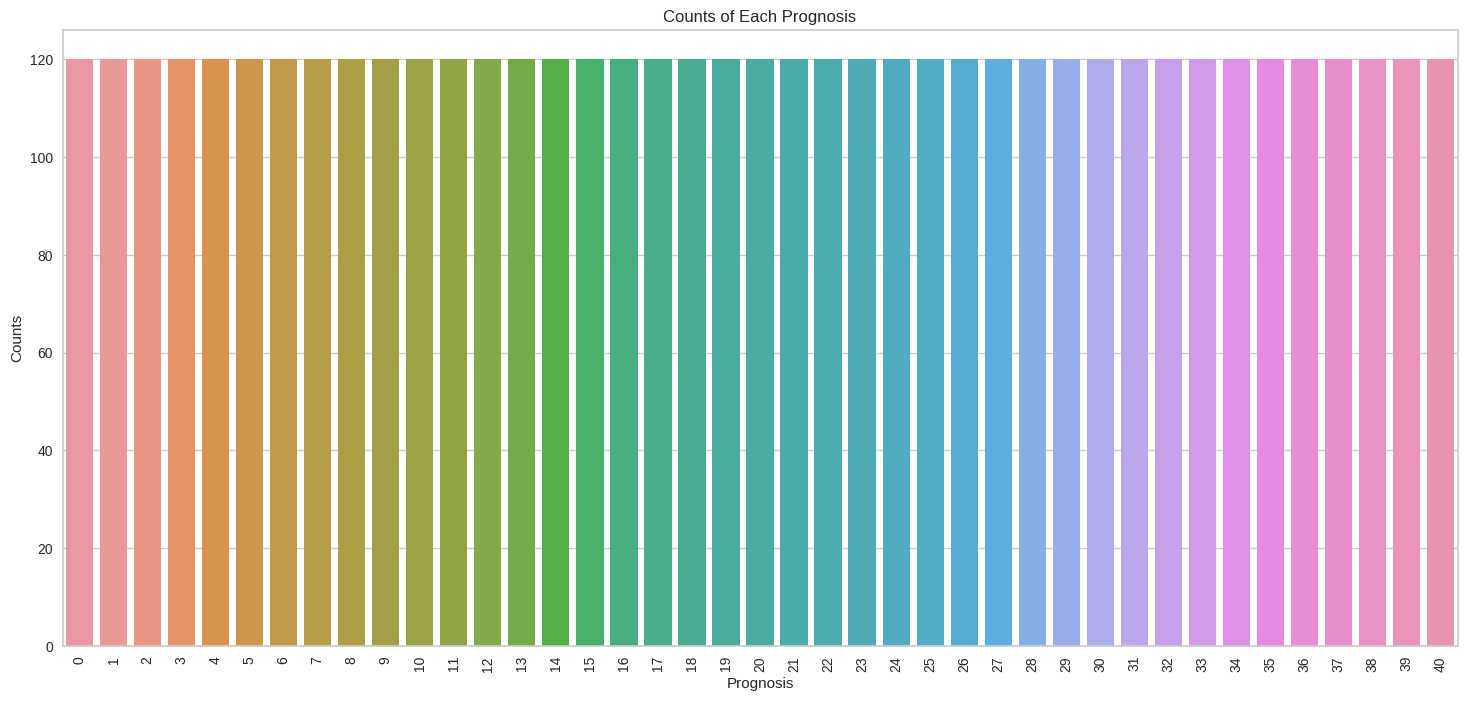

In [150]:
def plot_counts_bar(data, column, title):
    counts = data[column].value_counts()
    temp_df = pd.DataFrame({
        column.capitalize(): counts.index,
        "Counts": counts.values
    })

    plt.figure(figsize=(18, 8))
    sns.barplot(x=column.capitalize(), y="Counts", data=temp_df)
    plt.xticks(rotation=90)
    plt.title(f"Counts of Each {column.capitalize()}")
    plt.show()

# Plot disease counts
plot_counts_bar(data, "prognosis", "Disease")


In [26]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Assuming 'data' is your DataFrame
encoder = LabelEncoder()
data["prognosis"] = encoder.fit_transform(data["prognosis"].astype(str))

# Further processing, if needed
data = data.drop(['specialist'], axis=1)


In [27]:
X = data.iloc[:,:-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test =train_test_split(
X, y, test_size = 0.2, random_state = 24)

print(f"Train: {X_train.shape}, {y_train.shape}")
print(f"Test: {X_test.shape}, {y_test.shape}")


Train: (3936, 132), (3936,)
Test: (984, 132), (984,)


In [29]:
from sklearn.model_selection import cross_val_score
import numpy as np

def cv_scoring(estimator, X, y):
    return accuracy_score(y, estimator.predict(X))

models = {
    "knn_model": KNeighborsClassifier(n_neighbors=3),
    "Random Forest": RandomForestClassifier(random_state=18)
}

for model_name in models:
    model = models[model_name]
    scores = cross_val_score(model, X, y, cv=10,
                             n_jobs=-1,
                             scoring=cv_scoring)
    print("==" * 30)
    print(model_name)
    print(f"Scores: {scores}")
    print(f"Mean Score: {np.mean(scores)}")

knn_model
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Random Forest
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0


Accuracy on train data by KNN Classifier: 100.0
Accuracy on test data by KNN Classifier: 100.0


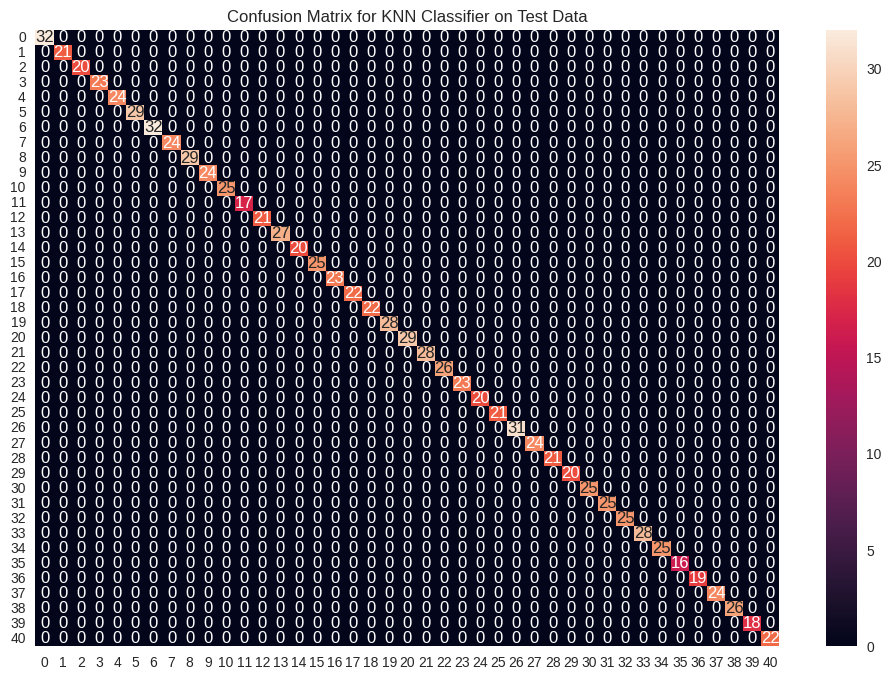

Accuracy on train data by Random Forest Classifier: 100.0
Accuracy on test data by Random Forest Classifier: 100.0


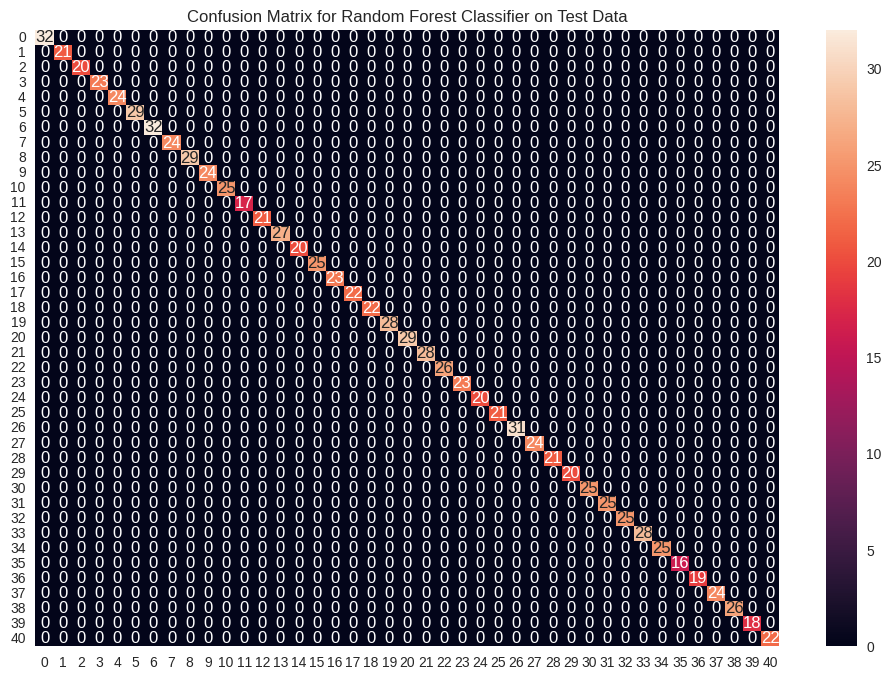

In [30]:

# KNN Classifier
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)
knn_preds = knn_model.predict(X_test)

print(f"Accuracy on train data by KNN Classifier: {accuracy_score(y_train, knn_model.predict(X_train)) * 100}")
print(f"Accuracy on test data by KNN Classifier: {accuracy_score(y_test, knn_preds) * 100}")

cf_matrix_knn = confusion_matrix(y_test, knn_preds)
plt.figure(figsize=(12, 8))
sns.heatmap(cf_matrix_knn, annot=True)
plt.title("Confusion Matrix for KNN Classifier on Test Data")
plt.show()

# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=18)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

print(f"Accuracy on train data by Random Forest Classifier: {accuracy_score(y_train, rf_model.predict(X_train)) * 100}")
print(f"Accuracy on test data by Random Forest Classifier: {accuracy_score(y_test, rf_preds) * 100}")

cf_matrix_rf = confusion_matrix(y_test, rf_preds)
plt.figure(figsize=(12, 8))
sns.heatmap(cf_matrix_rf, annot=True)
plt.title("Confusion Matrix for Random Forest Classifier on Test Data")
plt.show()


In [31]:
uploaded=files.upload()

Saving Testing.csv to Testing.csv


In [32]:
test_data = pd.read_csv('Testing.csv', encoding='ISO-8859-9')

In [34]:
from statistics import mode

In [35]:
# KNN classifier
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X, y)

# Random Forest model
rf_model = RandomForestClassifier(random_state=18)
rf_model.fit(X, y)


test_X = test_data.iloc[:, :-1]
test_Y = encoder.transform(test_data.iloc[:, -1])

# Predictions from individual models
knn_preds = knn_model.predict(test_X)
rf_preds = rf_model.predict(test_X)

# Combine predictions using mode
final_preds = [mode([i, j]) for i, j in zip(knn_preds, rf_preds)]

print(f"Accuracy on Test dataset by the combined model: {accuracy_score(test_Y, final_preds) * 100}")

Accuracy on Test dataset by the combined model: 100.0


In [37]:
uploaded=files.upload()

Saving docVSdisease.csv to docVSdisease.csv


In [38]:
uploaded=files.upload()

Saving Doctor_Specialist.csv to Doctor_Specialist.csv


In [148]:
from collections import Counter
import numpy as np
import pandas as pd

# Load the testing data
test_data = pd.read_csv("Testing.csv", encoding='latin1').dropna(axis=1)

# Assuming "prognosis" is the column containing the target labels
test_labels = test_data["prognosis"]

# Your existing code for data preparation
symptoms = test_data.columns[:-1]

symptom_index = {}
for index, value in enumerate(symptoms):
    symptom_index[value] = index

data_dict = {
    "symptom_index": symptom_index,
    "predictions_classes": encoder.classes_
}

# Function to find the mode prediction among a list of predictions
def find_mode(lst):
    counts = Counter(lst)
    max_count = max(counts.values())
    mode = [key for key, value in counts.items() if value == max_count]
    return mode[0] if mode else None

# Function to predict diseases based on symptoms
def predictDisease(user_symptoms):
    user_symptoms = [symptom.strip().lower() for symptom in user_symptoms.split(",")]

    # Check if the user_symptoms are in the dataset
    if not all(symptom in symptom_index for symptom in user_symptoms):
        print("Invalid symptom name. Please enter valid symptoms.")
        return []

    input_data = [1 if symptom in user_symptoms else 0 for symptom in symptoms]
    input_data = np.array(input_data).reshape(1, -1)

    knn_predictions = data_dict["predictions_classes"][knn_model.predict(input_data)[0]]
    rf_predictions = data_dict["predictions_classes"][rf_model.predict(input_data)[0]]

    # Get top 3 predictions from KNN and Random Forest
    top_knn_predictions = knn_model.predict_proba(input_data)[0].argsort()[-3:][::-1]
    top_rf_predictions = rf_model.predict_proba(input_data)[0].argsort()[-3:][::-1]

    # Display information for each prediction
    results = []
    for prediction_index in set(top_knn_predictions).union(top_rf_predictions):
        prediction = data_dict["predictions_classes"][prediction_index]
        doctor = f"{prediction} Doctor"
        specialist = f"{prediction} Specialist"

        # Add other symptoms related to the predicted disease (excluding input symptoms)
        related_symptoms = [symptom for symptom, idx in data_dict["symptom_index"].items() if
                            test_data.loc[test_data["prognosis"] == prediction, symptom].values[0] == 1]

        result = {
            "disease": prediction,
            "input_symptoms": user_symptoms,
            "related_symptoms": related_symptoms,
            "doctor": doctor,
            "specialist": specialist
        }
        results.append(result)

    return results
    return result['disease']

# Example usage
# Get user input for symptoms
user_symptoms_input = input("Enter the names of symptoms separated by commas: ")
prediction_results = predictDisease(user_symptoms_input)

# Display predictions
for result in prediction_results:
    print(f"\nPredicted Disease: {result['disease']}")
    print(f"Input Symptoms: {', '.join(result['input_symptoms'])}")

    if result['related_symptoms']:
        print(f"Related Symptoms: {', '.join(result['related_symptoms'])}")
    else:
        print("No related symptoms found.")


Enter the names of symptoms separated by commas: family_history


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(



Predicted Disease: Bronchial Asthma
Input Symptoms: family_history
Related Symptoms: fatigue, cough, high_fever, breathlessness, family_history, mucoid_sputum

Predicted Disease: Urinary tract infection
Input Symptoms: family_history
Related Symptoms: burning_micturition, bladder_discomfort, foul_smell_of urine, continuous_feel_of_urine

Predicted Disease: hepatitis A
Input Symptoms: family_history
Related Symptoms: joint_pain, vomiting, yellowish_skin, dark_urine, nausea, loss_of_appetite, abdominal_pain, diarrhoea, mild_fever, yellowing_of_eyes, muscle_pain

Predicted Disease: Fungal infection
Input Symptoms: family_history
Related Symptoms: itching, skin_rash, nodal_skin_eruptions, dischromic _patches

Predicted Disease: Hepatitis B
Input Symptoms: family_history
Related Symptoms: itching, fatigue, lethargy, yellowish_skin, dark_urine, loss_of_appetite, abdominal_pain, yellow_urine, yellowing_of_eyes, malaise, receiving_blood_transfusion, receiving_unsterile_injections

Predicted D

In [149]:
# Display predictions
for result in prediction_results:
    print(f"Recommended Doctor: {result['doctor']}")
    print(f"Recommended Specialist: {result['specialist']}")

    # Get doctor recommendations for the predicted disease
    recommendations_for_disease = get_recommendations(result['disease'])

    if not recommendations_for_disease.empty:
        print(f"\nDoctor Recommendations for {result['disease']}:")
        print(recommendations_for_disease)
    else:
        print(f"No doctor recommendations found for {result['disease']}.")

    print("\n" + "="*40 + "\n")  # Separating each prediction with a line


Recommended Doctor: Bronchial Asthma Doctor
Recommended Specialist: Bronchial Asthma Specialist

Doctor Recommendations for Bronchial Asthma:
                    name     specialist  experience               location  \
113    Dr. Kulkarni Ajit  Pulmonologist  23 years    Deccan Gymkhana, Pune   
115  Dr. Milind Kulkarni  Pulmonologist  18 years       Vishrantwadi, Pune   
120  Dr. Milind Kulkarni  Pulmonologist  18 years       Vishrantwadi, Pune   
114          Dr. Ashok B  Pulmonologist  19 years      Kalyani Nagar, Pune   
111    Dr. Nagesh Dhadge  Pulmonologist  23 years              Baner, Pune   

    average Fee  
113       ₹ 750  
115       ₹ 600  
120       ₹ 600  
114       ₹ 800  
111       ₹ 550  


Recommended Doctor: Urinary tract infection Doctor
Recommended Specialist: Urinary tract infection Specialist

Doctor Recommendations for Urinary tract infection:
                   name     specialist  experience               location  \
181  Dr. Vinod Bharati    Gynecologist 